<a href="https://colab.research.google.com/github/gadilshina-ve/SoftwareTools_DA/blob/main/LW_4/LW_4_GadilshinaVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Гадильшина Валентина Евгеньевна, БД-231м**

**Лабораторная работа 4. Аналитика данных в Polymatica Analytics**

**Вариант 16.** Оценка сезонных изменений в продажах

**Цель работы:** выполнить анализ сезонных изменений продаж (бронирований авиабилетов) и отобразить динамику продаж авиабилетов по кварталам.

**Датасет:** Australian Flight Dataset [2003-2022] https://www.kaggle.com/datasets/pandeyg0811/australian-flight-dataset-2003-2022

# 1. Загрузка данных и предобработка:



**1. Импорт необходимых библиотек для EDA**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import plotly.express as px
%matplotlib inline
sns.set(color_codes=True)

**2. Загрузка данных в data frame.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks GadilshinaVE/SoftwareTools_DA/Australian_Flight_Dataset_2003_2022.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Australian Flight Dataset [2003-2022]**

Этот датасет содержит ежемесячные данные о международных рейсах и количестве проданных мест в самолётах, выполняющих полёты в Австралию и из неё. В наборе данных представлены такие параметры, как город, авиакомпания, маршрут, страна и регион.

Словарь данных:
* Month: Дата (месяц и день)
* In_Out: Статус рейса (входящий/исходящий)
* Australian_City: Название австралийского города
* International_City: Название международного города
* Airline: Авиакомпания, выполняющая рейс
* Route: Маршрут рейса
* Port_Country: Страна порта
* Port_Region: Регион порта
* Service_Country: Страна обслуживания
* Service_Region: Регион обслуживания
* Stops: Количество остановок на маршруте
* All_Flights: Общее количество рейсов
* Passengers: Общее количесво проданных мест на рейс
* Year: Год
* Month_num: Номер месяца

**3. Проверка типов данных**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110055 entries, 0 to 110054
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   _id                 110055 non-null  int64 
 1   Month               110055 non-null  object
 2   In_Out              110055 non-null  object
 3   Australian_City     110055 non-null  object
 4   International_City  110055 non-null  object
 5   Airline             110055 non-null  object
 6   Route               110055 non-null  object
 7   Port_Country        110055 non-null  object
 8   Port_Region         110055 non-null  object
 9   Service_Country     110055 non-null  object
 10  Service_Region      110055 non-null  object
 11  Stops               110055 non-null  int64 
 12  All_Flights         110055 non-null  int64 
 13  Max_Seats           110055 non-null  int64 
 14  Year                110055 non-null  int64 
 15  Month_num           110055 non-null  int64 
dtypes:

In [4]:
# Преобразование года и номера месяца в формат даты (с фиксированным днем)
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month_num'].astype(str), format='%Y-%m')

# Сортируем даты по времени
df = df.sort_values('Date')

**4. Добавление столбцов, необходимых для заданий 16 Варианта.**

In [5]:
# Функция для определения квартала по номеру месяца
def get_quarter(month_num):
    if month_num in [1, 2, 3]:
        return 1  # 1 квартал
    elif month_num in [4, 5, 6]:
        return 2  # 2 квартал
    elif month_num in [7, 8, 9]:
        return 3  # 3 квартал
    elif month_num in [10, 11, 12]:
        return 4  # 4 квартал

# Применяем функцию и создаем новый столбец 'Quarter'
df['Quarter'] = df['Month_num'].apply(get_quarter)

In [6]:
# Преобразуем числовой столбец в названия месяцев
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
df['Month_'] = df['Month_num'].map(month_map)

In [7]:
# Функция для определения сезонов
season_map = {
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn'
}

# Применяем функцию для создания нового столбца 'Season'
df['Season'] = df['Month_'].map(season_map)

**5. Удаление нерелевантных столбцов.**

In [8]:
df = df.drop(['Month', 'Month_num'], axis=1)

**6. Переименование столбцов**

In [9]:
df = df.rename(columns={"_id": "Record_ID",
    "In_Out": "Flight_Status",
    "Australian_City": "Australian_City",
    "International_City": "International_City",
    "Airline": "Airline_Name",
    "Route": "Route",
    "Country": "Port_Country",
    "Port_Region": "Port_Region",
    "Service_Country": "Service_Country",
    "Service_Region": "Service_Region",
    "Stops": "Stops",
    "All_Flights": "Total_Flights",
    "Max_Seats": "Passengers",
    "Year": "Year",
    "Month_": "Month"})
df.head(5)

,Record_ID,Flight_Status,Australian_City,International_City,Airline_Name,Route,Port_Country,Port_Region,Service_Country,Service_Region,Stops,Total_Flights,Passengers,Year,Date,Quarter,Month,Season
0,1,I,Adelaide,Denpasar,Garuda Indonesia,DPS-ADL-MEL,Indonesia,SE Asia,Indonesia,SE Asia,0,13,3809,2003,2003-09-01,3,September,Autumn
386,387,O,Melbourne,Guangzhou,China Southern Airlines,MEL-SYD-CAN,China,NE Asia,China,NE Asia,1,9,2583,2003,2003-09-01,3,September,Autumn
387,388,O,Melbourne,Hamilton,Freedom Air International,MEL-HLZ,New Zealand,New Zealand,New Zealand,New Zealand,0,9,1278,2003,2003-09-01,3,September,Autumn
388,389,O,Melbourne,Hanoi,Vietnam Airlines,MEL-SGN-HAN,Vietnam,SE Asia,Vietnam,SE Asia,1,9,2310,2003,2003-09-01,3,September,Autumn
389,390,O,Melbourne,Ho Chi Minh City,Vietnam Airlines,MEL-SGN-HAN,Vietnam,SE Asia,Vietnam,SE Asia,0,9,2310,2003,2003-09-01,3,September,Autumn


**6. Проверка повторяющихся строк**

In [10]:
df.shape

(110055, 18)

In [11]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 18)


**7. Проверка отсутствующих или нулевых значений**

In [12]:
print(df.isnull().sum())

Record_ID             0
Flight_Status         0
Australian_City       0
International_City    0
Airline_Name          0
Route                 0
Port_Country          0
Port_Region           0
Service_Country       0
Service_Region        0
Stops                 0
Total_Flights         0
Passengers            0
Year                  0
Date                  0
Quarter               0
Month                 0
Season                0
dtype: int64


**8. Описательная статистика**

In [13]:
descriptive_stats = df[['Stops', 'Total_Flights', 'Passengers']].describe()
descriptive_stats

,Stops,Total_Flights,Passengers
count,110055.000000,110055.000000,110055.000000
mean,0.162464,24.775367,6610.760910
std,0.388295,21.450937,6197.412623
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2461.000000
50%,0.000000,21.000000,4928.000000
75%,0.000000,31.000000,9018.000000
max,3.000000,178.000000,52596.000000


**9. Обнаружение выбросов**

<Axes: xlabel='Passengers'>

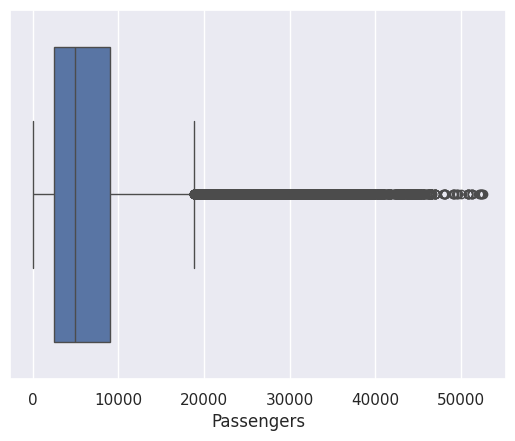

In [14]:
sns.boxplot(x=df['Passengers'])

<Axes: xlabel='Total_Flights'>

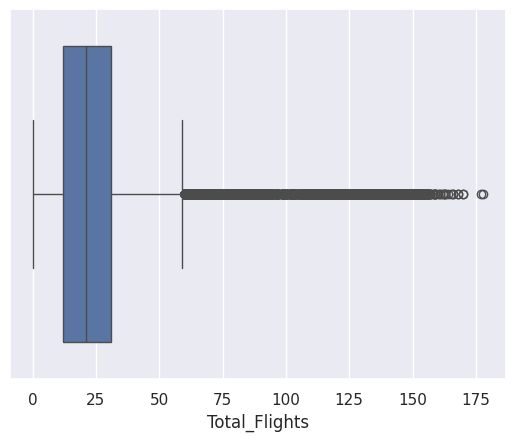

In [15]:
sns.boxplot(x=df['Total_Flights'])

**Естественные выбросы:** Скорее всего выбросы - это очень высокий спрос в праздничные дни или популярные направления (короткие дистанции полета), их следует оставить, поскольку они могут содержать важную информацию о поведении пассажиров.

In [16]:
# Сохранение данных в Excel
df.to_excel('Australian_Flight_Dataset.xlsx', index=False)

In [17]:
from google.colab import files
files.download('Australian_Flight_Dataset.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
# Сохранение данных в CSV
df.to_csv('Australian_Flight_Dataset.csv', index=False)

In [19]:
from google.colab import files
files.download('Australian_Flight_Dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. Анализ данных:

### **1. Суммарное количество внутренних рейсов по городам Австралии:**

In [20]:
#Australian_City (Внутренние рейсы)
sum_australian_cities = df.groupby('Australian_City')['Total_Flights'].sum().reset_index()
sum_australian_cities.columns = ['Australian_City', 'Total_Flights_Sum']
sum_australian_cities = sum_australian_cities.sort_values(by='Total_Flights_Sum', ascending=False)
print("Количество внутренних рейсов городам Австралии:")
sum_australian_cities

Количество внутренних рейсов городам Австралии:


,Australian_City,Total_Flights_Sum
14,Sydney,1106422
8,Melbourne,615771
1,Brisbane,450604
11,Perth,296659
2,Cairns,82369
6,Gold Coast,65617
0,Adelaide,60771
5,Darwin,39424
3,Canberra,4243
10,Norfolk Island,1827


In [21]:
#Топ-5 австралийских городов по количеству рейсов
top_5_australian_cities = sum_australian_cities.nlargest(5, 'Total_Flights_Sum')

<ipython-input-22-fbbdabbb1116>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Flights_Sum', y='Australian_City', data=top_5_australian_cities, palette='viridis')


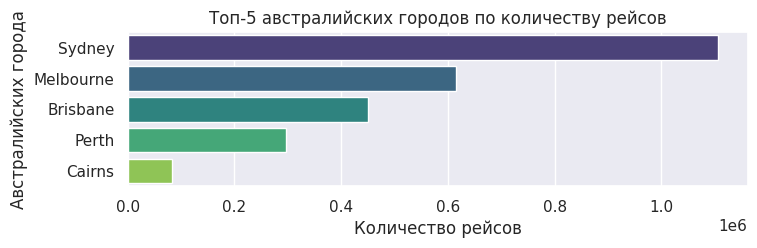

In [22]:
#Топ-5 австралийских городов по количеству рейсов
plt.figure(figsize=(8, 2))
sns.barplot(x='Total_Flights_Sum', y='Australian_City', data=top_5_australian_cities, palette='viridis')
plt.title('Топ-5 австралийских городов по количеству рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Австралийских города')
plt.show()

**Вывод:** самые перегруженные аэропорты в Австралии: Сидней, Мельбурн, Брисбен. Больше всего внутренних рейсов было совершено в этих аэропортах.

**Рекомендации:**
1. Оптимизировать расписание рейсов, чтобы уменьшить время ожидания и повысить эффективность обслуживания пассажиров.
2. Увеличить число рейсов на самых популярных направлениях, чтобы удовлетворить растущий спрос.
3. Создать программы лояльности для частых путешественников, что может помочь увеличить количество постоянных клиентов.

### **2. Суммарное количество международных рейсов по городам:**

In [23]:
sum_international_cities = df.groupby('International_City')['Total_Flights'].sum().reset_index()
sum_international_cities.columns = ['International_City', 'Total_Flights_Sum']
sum_international_cities = sum_international_cities.sort_values(by='Total_Flights_Sum', ascending=False)
print("Количество международных рейсов по городам:")
sum_international_cities

Количество международных рейсов по городам:


,International_City,Total_Flights_Sum
2,Auckland,371125
91,Singapore,363522
20,Denpasar,178710
37,Hong Kong,169726
45,Kuala Lumpur,137786
...,...,...
55,Manchester (US),2
72,Penang,2
49,Lima,2
93,Surabaya,1


In [24]:
#Топ-15 международных городов по количеству рейсов
top_15_international_cities = sum_international_cities.nlargest(15, 'Total_Flights_Sum')

<ipython-input-25-62cb1ee66597>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Flights_Sum', y='International_City', data=top_15_international_cities, palette='viridis')


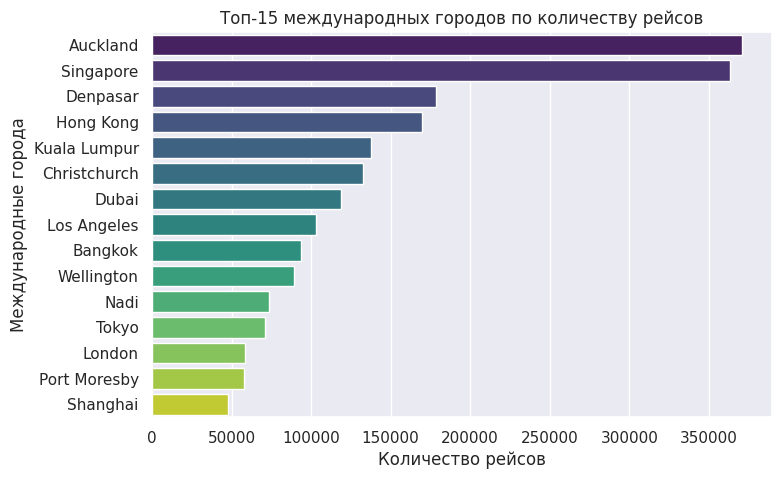

In [25]:
# Топ-15 международных городов по количеству рейсов
plt.figure(figsize=(8, 5))
sns.barplot(x='Total_Flights_Sum', y='International_City', data=top_15_international_cities, palette='viridis')
plt.title('Топ-15 международных городов по количеству рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Международные города')
plt.show()

**Вывод:** самые перегруженные международные аэропорты: Окленд в Новой Зеландии, Сингапур, Денпасар в Индонезии, Гонконг в Китае и Куала-Лумпур в Малайзии. Больше всего рейсов в/из Австралии было совершено в этих аэропорты.

**Рекомендации:**
1. Расширить код-шеринговые соглашения. Это позволит повысить доступность рейсов и улучшить связность для пассажиров, что может привести к увеличению числа рейсов в/из Австралии.
2. Увеличить частоту рейсов. Это поможет удовлетворить растущий интерес и потребности клиентов.
3. Проводить совместные маркетинговые кампаний с аэропортами и авиакомпаниями, чтобы привлечь больше пассажиров на рейсы в/из Австралии.

### **3. Суммарное количество рейсов и пассажиров по авиакомпаниям:**

In [26]:
sum_airlines = df.groupby('Airline_Name')['Total_Flights'].sum().reset_index()
sum_airlines.columns = ['Airline_Name', 'Total_Flights_Sum']
sum_airlines = sum_airlines.sort_values(by='Total_Flights_Sum', ascending=False)
print("Количество рейсов по авиакомпаниям:")
sum_airlines

Количество рейсов по авиакомпаниям:


,Airline_Name,Total_Flights_Sum
63,Qantas Airways,522252
9,Air New Zealand,237272
49,Jetstar,224210
87,Virgin Australia,199151
35,Emirates,186798
...,...,...
22,Bamboo Airways,209
5,Air Chathams,82
66,Royal Tongan Airlines,71
51,Jin Air,54


In [27]:
sum_airlines_passengers = df.groupby('Airline_Name')['Passengers'].sum().reset_index()
sum_airlines_passengers.columns = ['Airline_Name', 'Passengers_Sum']
sum_airlines_passengers = sum_airlines_passengers.sort_values(by='Passengers_Sum', ascending=False)
print("Количество пассажиров по авиакомпаниям:")
sum_airlines_passengers

Количество пассажиров по авиакомпаниям:


,Airline_Name,Passengers_Sum
63,Qantas Airways,144791757
35,Emirates,71577986
72,Singapore Airlines,56943606
49,Jetstar,52369477
9,Air New Zealand,47786322
...,...,...
51,Jin Air,21114
57,Merpati Nusantara Airlines,16388
66,Royal Tongan Airlines,12907
5,Air Chathams,3560


In [28]:
#Топ-10 авиакомпаний по количеству рейсов
top_10_airline_name_1 = sum_airlines.nlargest(10, 'Total_Flights_Sum')

#Топ-5 авиакомпаний по количеству пассажиров
top_10_airline_name_2 = sum_airlines_passengers.nlargest(10, 'Passengers_Sum')

<ipython-input-29-8138154bb7bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Flights_Sum', y='Airline_Name', data=top_10_airline_name_1, palette='viridis')


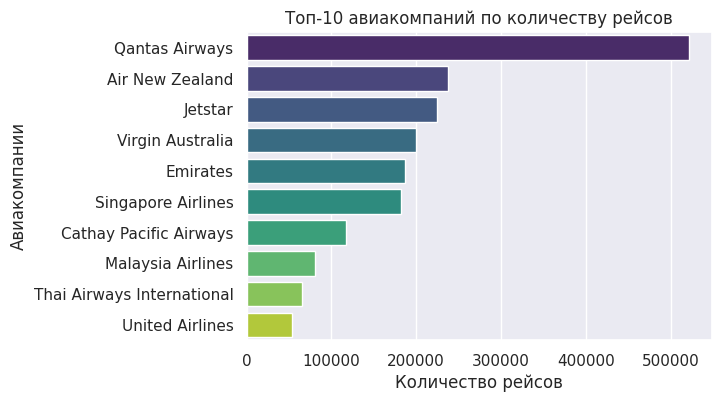

In [29]:
# Построение гистограммы для топ-10 авиакомпаний по количеству рейсов
plt.figure(figsize=(6, 4))
sns.barplot(x='Total_Flights_Sum', y='Airline_Name', data=top_10_airline_name_1, palette='viridis')
plt.title('Топ-10 авиакомпаний по количеству рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Авиакомпании')
plt.show()

**Вывод:** самые популярные авиакомпании по количеству рейсов: Qantas Airways (Австралия), Air New Zealand (Новая Зеландия), Jetstar (Австралия), Virgin Australia (Австралия), Emirates (ОАЭ), Singapore Airlines (Сингапур).

<ipython-input-30-079951b3d3ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Passengers_Sum', y='Airline_Name', data=top_10_airline_name_2, palette='viridis')


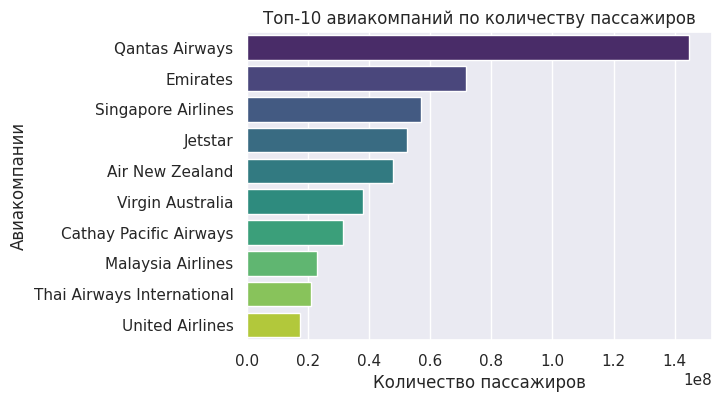

In [30]:
# Построение гистограммы для топ-10 авиакомпаний по количеству пассажиров
plt.figure(figsize=(6, 4))
sns.barplot(x='Passengers_Sum', y='Airline_Name', data=top_10_airline_name_2, palette='viridis')
plt.title('Топ-10 авиакомпаний по количеству пассажиров')
plt.xlabel('Количество пассажиров')
plt.ylabel('Авиакомпании')
plt.show()

**Выводы:**

*1. Количество рейсов:*

1. Лидером по количеству рейсов является Qantas Airways (Австралия) с большим отрывом.
2. Также в топ входят Air New Zealand (Новая Зеландия), Jetstar (Австралия) и Virgin Australia (Австралия), которые предоставляют значительное количество рейсов.
3. В топ-10 попали авиакомпании из разных регионов, включая Emirates (ОАЭ) и Singapore Airlines (Сингапур), которые занимают важные позиции на международных направлениях.

*2. Количество пассажиров:*

1. Qantas Airways (Австралия) также лидирует по количеству пассажиров, что подтверждает её доминирующую позицию на рынке как по количеству рейсов, так и по объёму пассажиропотока.
2. Emirates (ОАЭ) и Singapore Airlines (Сингапур) занимают более высокие позиции в рейтинге по пассажирам, чем по количеству рейсов, что может указывать на то, что они обслуживают крупные дальние маршруты с высокой загрузкой.
3. В топе также присутствуют Jetstar (Австралия), Air New Zealand (Новая Зеландия), и Virgin Australia (Австралия), что свидетельствует об их высокой популярности среди пассажиров на международных и региональных направлениях.

**Рекомендации:**

1. Оптимизация маршрутов: Qantas Airways (Австралия), Emirates (ОАЭ) и Singapore Airlines (Сингапур) демонстрируют высокую загрузку по пассажирам. Рекомендуется усиливать сотрудничество с этими авиакомпаниями, развивать и оптимизировать маршруты с их участием для повышения рентабельности.

2. Развитие стратегических международных партнерств: Авиакомпании с высоким пассажиропотоком, такие как Emirates (ОАЭ) и Singapore Airlines (Сингапур), могут стать ключевыми партнёрами для расширения международных направлений. Австралийские аэропорты могут предложить специальные условия для привлечения этих авиакомпаний и увеличения международных рейсов.

3. Улучшение качества обслуживания: Поскольку пассажиры выбирают компании с высоким уровнем комфорта и качественным сервисом, важно поддерживать высокий уровень обслуживания, чтобы привлечь больше пассажиров на рейсы авиакомпаний с менее высокой загрузкой.

### **4. Анализ маршрутов по сезонам**

<ipython-input-31-b010cadd8ff5>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_routes_per_season = season_route_data.groupby('Season').apply(lambda x: x.nlargest(5, 'Total_Flights')).reset_index(drop=True)


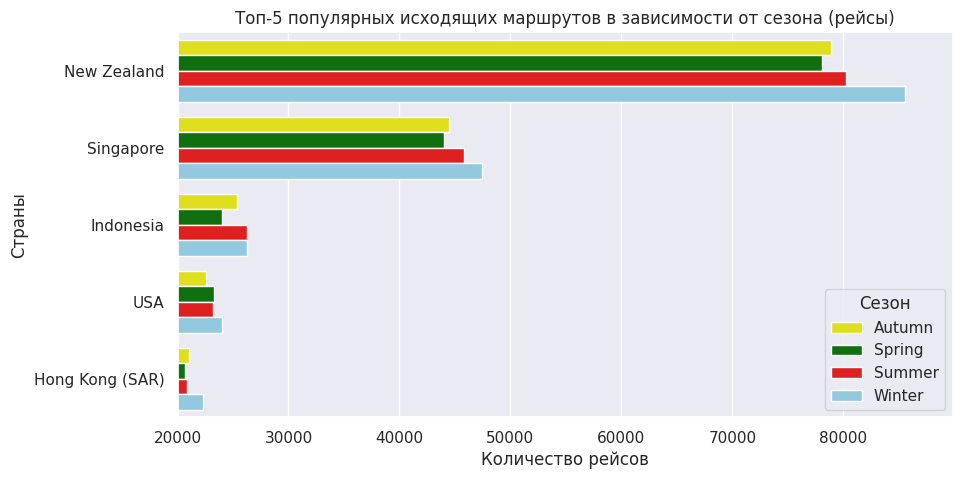

In [31]:
# Фильтруем данные, оставляя только исходящие рейсы из Австралии (Flight_Status = 'O')
outgoing_flights = df[df['Flight_Status'] == 'O']

# Группируем данные по маршрутам и сезонам, суммируя количество рейсов
season_route_data = outgoing_flights.groupby(['Port_Country', 'Season']).agg({
    'Total_Flights': 'sum'
}).reset_index()

# Получаем топ-5 маршрутов для каждого сезона по количеству рейсов
top_routes_per_season = season_route_data.groupby('Season').apply(lambda x: x.nlargest(5, 'Total_Flights')).reset_index(drop=True)

custom_palette = {
    'Winter': 'skyblue',
    'Spring': 'green',
    'Summer': 'red',
    'Autumn': 'yellow'
}

plt.figure(figsize=(10, 5))
sns.barplot(x='Total_Flights', y='Port_Country', hue='Season', data=top_routes_per_season, palette=custom_palette)
plt.xlim(20000, None)
plt.title('Топ-5 популярных исходящих маршрутов в зависимости от сезона (рейсы)')
plt.xlabel('Количество рейсов')
plt.ylabel('Страны')
plt.legend(title='Сезон')
plt.show()

<ipython-input-32-b1e51424729a>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_routes_per_season = season_route_data.groupby('Season').apply(lambda x: x.nlargest(5, 'Passengers')).reset_index(drop=True)


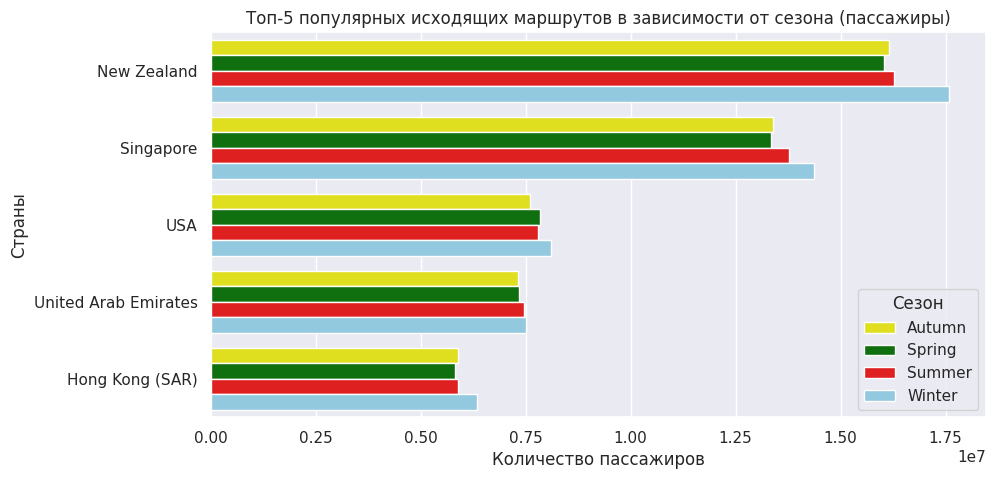

In [32]:
# Фильтруем данные, оставляя только исходящие рейсы из Австралии (Flight_Status = 'O')
outgoing_flights = df[df['Flight_Status'] == 'O']

# Группируем данные по маршрутам и сезонам, суммируя количество пассажиров
season_route_data = outgoing_flights.groupby(['Port_Country', 'Season']).agg({
    'Passengers': 'sum'
}).reset_index()

# Получаем топ-5 маршрутов для каждого сезона по количеству рейсов
top_routes_per_season = season_route_data.groupby('Season').apply(lambda x: x.nlargest(5, 'Passengers')).reset_index(drop=True)

custom_palette = {
    'Winter': 'skyblue',
    'Spring': 'green',
    'Summer': 'red',
    'Autumn': 'yellow'
}

plt.figure(figsize=(10, 5))
sns.barplot(x='Passengers', y='Port_Country', hue='Season', data=top_routes_per_season, palette=custom_palette)
plt.title('Топ-5 популярных исходящих маршрутов в зависимости от сезона (пассажиры)')
plt.xlabel('Количество пассажиров')
plt.ylabel('Страны')
plt.legend(title='Сезон')
plt.show()

**Вывод:**

Популярные страны по количеству рейсов и пассажиров:
1. На обоих графиках наблюдается схожий тренд. Новая Зеландия и Сингапур занимают лидирующие позиции как по количеству рейсов, так и по числу пассажиров в течение всех сезонов. Это указывает на то, что эти направления стабильно популярны.
2. Индонезия занимает третье место по количеству рейсов, но отсутствует в топе по числу пассажиров, что может указывать на меньшее количество пассажиров на рейсах или на более короткие полеты.
3. США и Гонконг (SAR) присутствуют в обоих топах, что говорит о том, что эти направления также популярны среди пассажиров.

Сезонность:
1. Зимой наблюдается пик активности по большинству стран (например, Новая Зеландия, Сингапур, США), как по количеству рейсов, так и по пассажирам. Это может быть связано с отпускным сезоном.
2. Лето также показывает высокие показатели, но чуть ниже, чем зимний период.
3. Весной и осенью наблюдается снижение активности.

<ipython-input-33-b52851a6f74d>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_routes_per_season = season_route_data.groupby('Season').apply(lambda x: x.nlargest(5, 'Total_Flights')).reset_index(drop=True)


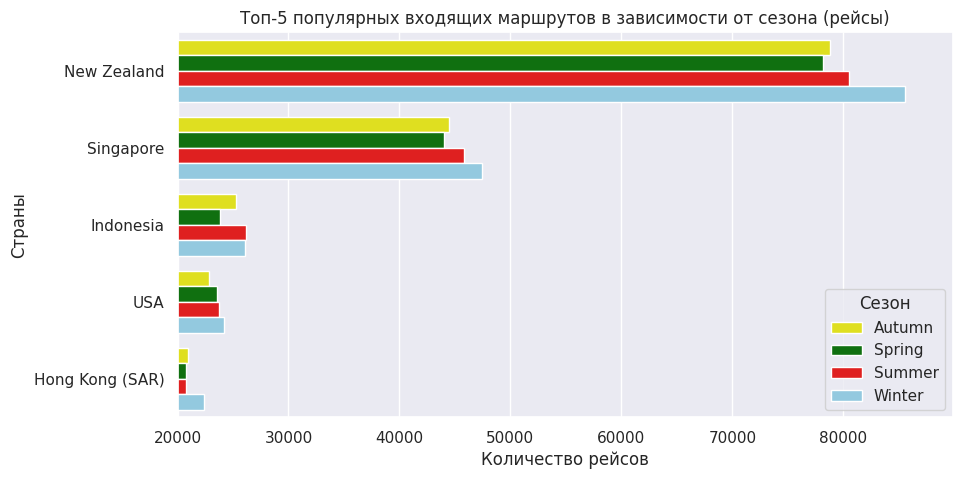

In [33]:
# Фильтруем данные, оставляя только входящие рейсы в Австралию (Flight_Status = 'I')
outgoing_flights = df[df['Flight_Status'] == 'I']

# Группируем данные по маршрутам и сезонам, суммируя количество рейсов
season_route_data = outgoing_flights.groupby(['Port_Country', 'Season']).agg({
    'Total_Flights': 'sum'
}).reset_index()

# Получаем топ-5 маршрутов для каждого сезона по количеству рейсов
top_routes_per_season = season_route_data.groupby('Season').apply(lambda x: x.nlargest(5, 'Total_Flights')).reset_index(drop=True)

custom_palette = {
    'Winter': 'skyblue',
    'Spring': 'green',
    'Summer': 'red',
    'Autumn': 'yellow'
}

plt.figure(figsize=(10, 5))
sns.barplot(x='Total_Flights', y='Port_Country', hue='Season', data=top_routes_per_season, palette=custom_palette)
plt.xlim(20000, None)
plt.title('Топ-5 популярных входящих маршрутов в зависимости от сезона (рейсы)')
plt.xlabel('Количество рейсов')
plt.ylabel('Страны')
plt.legend(title='Сезон')
plt.show()

<ipython-input-34-3cc1ca1d1ef2>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_routes_per_season = season_route_data.groupby('Season').apply(lambda x: x.nlargest(5, 'Passengers')).reset_index(drop=True)


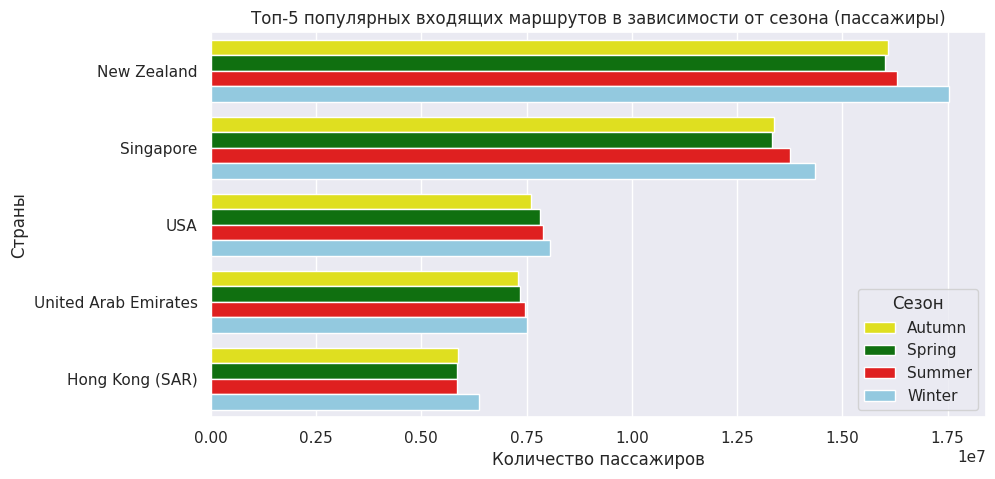

In [34]:
# Фильтруем данные, оставляя только входящие рейсы в Австралию (Flight_Status = 'I')
outgoing_flights = df[df['Flight_Status'] == 'I']

# Группируем данные по маршрутам и сезонам, суммируя количество пассажиров
season_route_data = outgoing_flights.groupby(['Port_Country', 'Season']).agg({
    'Passengers': 'sum'
}).reset_index()

# Получаем топ-5 маршрутов для каждого сезона по количеству пассажиров
top_routes_per_season = season_route_data.groupby('Season').apply(lambda x: x.nlargest(5, 'Passengers')).reset_index(drop=True)

custom_palette = {
    'Winter': 'skyblue',
    'Spring': 'green',
    'Summer': 'red',
    'Autumn': 'yellow'
}


plt.figure(figsize=(10, 5))
sns.barplot(x='Passengers', y='Port_Country', hue='Season', data=top_routes_per_season, palette=custom_palette)
plt.title('Топ-5 популярных входящих маршрутов в зависимости от сезона (пассажиры)')
plt.xlabel('Количество пассажиров')
plt.ylabel('Страны')
plt.legend(title='Сезон')
plt.show()

**Вывод:**

Лидеры по маршрутам:
1. Новая Зеландия возглавляет оба графика как по количеству рейсов, так и по числу пассажиров, с пиком зимой.
2. Сингапур стабильно занимает второе место по обоим показателям, с аналогичным распределением по сезонам.

Количество рейсов против пассажиров:
1. На первом графике по рейсам видно, что Индонезия и США занимают места в топе. В отличие от этого, во втором графике по пассажирам их заменяют Объединенные Арабские Эмираты.
2. Разница может указывать на то, что в Индонезию и США летает больше рейсов, но в ОАЭ путешествует больше пассажиров на каждом рейсе.

Сезонные колебания:
1. Зима — самый загруженный сезон для большинства стран по обоим показателям.
2. Осень и весна часто занимают промежуточные позиции, при этом лето стабильно является активным сезоном.

**Рекомендации:**
1. Маркетинговая стратегия: Для стран, таких как Новая Зеландия и Сингапур, рекламные кампании можно усиливать в зимние и летние сезоны, когда наблюдаются пиковые объемы пассажиропотока и рейсов.
2. Оптимизация рейсов в США и Индонезию: Эти страны могут увеличить эффективность, добавив больше пассажиров на рейс, так как они лидируют по числу рейсов, но не по числу пассажиров.
3. Модели для ОАЭ: Более крупные рейсы или улучшенные предложения для пассажиров могут быть выгодны для маршрутов в ОАЭ, учитывая высокий пассажиропоток.

### **5. Покупательская активность по авиакомпаниям и городам**

In [35]:
# Среднее количество рейсов по авиакомпаниям
avg_flights_by_airline = df.groupby('Airline_Name')['Total_Flights'].mean().reset_index()
avg_flights_by_airline = avg_flights_by_airline.sort_values(by='Total_Flights', ascending=False)

In [36]:
fig = px.bar(avg_flights_by_airline,
             x='Airline_Name',
             y='Total_Flights',
             title='Среднее количество рейсов по авиакомпаниям',
             labels={'Total_Flights':'Среднее количество рейсов', 'Airline_Name':'Авиакомпания'},
             text='Total_Flights',
             height=600)


fig.update_layout(
    xaxis_title='Авиакомпания',
    yaxis_title='Среднее количество рейсов',
    xaxis_tickangle=-45,
    uniformtext_minsize=8,
    uniformtext_mode='hide',
)

fig.show()

In [37]:
# Среднее количество рейсов по городам Австралии
avg_flights_by_city = df.groupby('Australian_City')['Total_Flights'].mean().reset_index()
avg_flights_by_city = avg_flights_by_city.sort_values(by='Total_Flights', ascending=False)

In [38]:
fig = px.bar(avg_flights_by_city,
             x='Australian_City',
             y='Total_Flights',
             title='Среднее количество рейсов по городам Австралии',
             labels={'Total_Flights':'Среднее количество рейсов', 'Australian_City':'Город'},
             height=600)


fig.update_layout(
    xaxis_title='Город',
    yaxis_title='Среднее количество рейсов',
    xaxis_tickangle=-45,
    uniformtext_minsize=8,
    uniformtext_mode='hide',
)

fig.show()

In [39]:
# Среднее количество рейсов по международным городам
avg_flights_by_city = df.groupby('International_City')['Total_Flights'].mean().reset_index()
avg_flights_by_city = avg_flights_by_city.sort_values(by='Total_Flights', ascending=False)

In [40]:
fig = px.bar(avg_flights_by_city,
             x='International_City',
             y='Total_Flights',
             title='Среднее количество рейсов по международным городам',
             labels={'Total_Flights':'Среднее количество рейсов', 'International_City':'Город'},
             height=600)

fig.update_layout(
    xaxis_title='Город',
    yaxis_title='Среднее количество рейсов',
    xaxis_tickangle=-45,
    uniformtext_minsize=8,
    uniformtext_mode='hide',
)

fig.show()

### **6. Временные ряды для анализа трендов (Динамика продаж по кварталам)**

In [41]:
import plotly.express as px

# Создание столбца с кварталами в формате 'Год-QX'
df['Quarter'] = df['Date'].dt.year.astype(str) + '-Q' + df['Date'].dt.quarter.astype(str)

# Сгруппируем данные по кварталам
quarterly_data = df.groupby('Quarter')['Total_Flights'].sum().reset_index()

# Построение интерактивного графика
fig = px.line(quarterly_data,
              x='Quarter',
              y='Total_Flights',
              title='Динамика продаж по кварталам (рейсы)',
              labels={'Total_Flights':'Количество рейсов', 'Quarter':'Квартал'},
              markers=True)

fig.update_layout(
    xaxis_title='Квартал',
    yaxis_title='Количество рейсов',
    xaxis_tickangle=-45,
    hovermode="x unified"
)

fig.show()

In [42]:
# Создание столбца с кварталами в формате 'Год-QX'
df['Quarter'] = df['Date'].dt.year.astype(str) + '-Q' + df['Date'].dt.quarter.astype(str)

# Сгруппируем данные по кварталам
quarterly_data = df.groupby('Quarter')['Passengers'].sum().reset_index()

# Построение интерактивного графика
fig = px.line(quarterly_data,
              x='Quarter',
              y='Passengers',
              title='Динамика продаж по кварталам (пассажиры)',
              labels={'Passengers':'Количество пассажиров', 'Quarter':'Квартал'},
              markers=True)

fig.update_layout(
    xaxis_title='Квартал',
    yaxis_title='Количество пассажиров',
    xaxis_tickangle=-45,
    hovermode="x unified"
)

fig.show()

**Выводы:**

Стабильный рост до 2020 года:
1. Начиная с 2013 года, количество рейсов и пассажиров показывает стабильный рост, достигая пика в последнем квартале 2019 года.
2. Это говорит о стабильной или увеличивающейся потребности в авиаперевозках в предыдущие годы.

Резкий спад в 2020-Q1:
1. В первом квартале 2020 года наблюдается резкое падение количества рейсов и пассажиров практически до нуля.
2. Этот спад связан с пандемией COVID-19 и введенными ограничениями на передвижение, что сильно повлияло на авиационную отрасль.

Постепенное восстановление:
1. Начиная с середины 2020 года, количество рейсов и пассажиров начинает постепенно восстанавливаться, хотя до прежнего уровня докризисного периода пока не дошло (по данным на последний период графика).

Значительное ускорение в последние кварталы:

1. Начиная с конца 2021 и в 2022-2023 году, восстановление идет более быстрыми темпами.

**Рекомендации:**
1. Мониторинг восстановления: Отслеживать темпы восстановления и адаптировать планы на основе спроса. Если восстановление продолжится, важно обеспечить достаточное количество рейсов и предложений для клиентов.
2. Разработка стратегии лояльности: Для стимулирования дальнейшего роста может быть полезным сфокусироваться на программах лояльности, скидках или улучшенных условиях для клиентов, возвращающихся к авиаперелетам после спада.
3. Инвестиции в маркетинг: Важно использовать восстановление для усиления маркетинговых кампаний, направленных на привлечение пассажиров.